In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_scatter(df, x_column, y_column, labels=None):
    plt.figure(figsize=(8, 6))
    
    if labels:
        filtered_df = df.dropna(subset=[x_column, y_column, labels])
    else:
        filtered_df = df.dropna(subset=[x_column, y_column])

    sns.scatterplot(x=x_column, y=y_column, data=filtered_df)
    
    if labels:
        for i in range(len(filtered_df)):
            plt.text(filtered_df[x_column].iloc[i], filtered_df[y_column].iloc[i], filtered_df[labels].iloc[i], fontsize=9)
    
    plt.title(f'Scatter Plot of {x_column} vs {y_column}')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.show()

or_lock = '../output/or_lock.csv'
or_df = pd.read_csv(or_lock)
or_df = or_df.groupby('name').mean().reset_index()
or_df = or_df.rename(columns={'total_time': 'or_total_time'})
or_df.loc[or_df['name'] == 'bubblesort']

,name,no_of_races_detected,or_total_time
4,bubblesort,890.0,124964.333333


In [5]:
xor_lock = '../output/xor_lock.csv'
xor_df = pd.read_csv(xor_lock)
xor_df = xor_df.groupby('name').mean().reset_index()
xor_df = xor_df.rename(columns={'total_time': 'xor_total_time'})
xor_df.loc[xor_df['name'] == 'bubblesort']

,name,no_of_races_detected,xor_total_time
4,bubblesort,890.0,102213.0


In [6]:
combined_df = pd.merge(xor_df[['name', 'xor_total_time']], or_df[['name', 'or_total_time']], on='name')
combined_df['no_of_races_detected'] = xor_df['no_of_races_detected']

combined_df

,name,xor_total_time,or_total_time,no_of_races_detected
0,account,8.333333,11.000000,5.0
1,airlinetickets,8.000000,12.000000,30.0
2,array,8.000000,8.333333,0.0
3,boundedbuffer,7.333333,10.333333,9.0
4,bubblesort,102213.000000,124964.333333,890.0
5,clean,102711.666667,133274.666667,248.0
6,critical,6.666667,6.333333,8.0
7,lang,1480.333333,1535.666667,1632.0
8,mergesort,84.666667,168.666667,55.0
9,pingpong,9.000000,7.666667,14.0


In [7]:
lock_experiment = '../output/lock_experiment.csv'
lock_experiment_df = pd.read_csv(lock_experiment)
lock_experiment_df

,n,time_taken
0,1,10238
1,3,24410
2,2,18315
3,4,25672
4,5,50568
5,6,97551
6,7,134672
7,8,158397
8,9,271540
9,10,451265


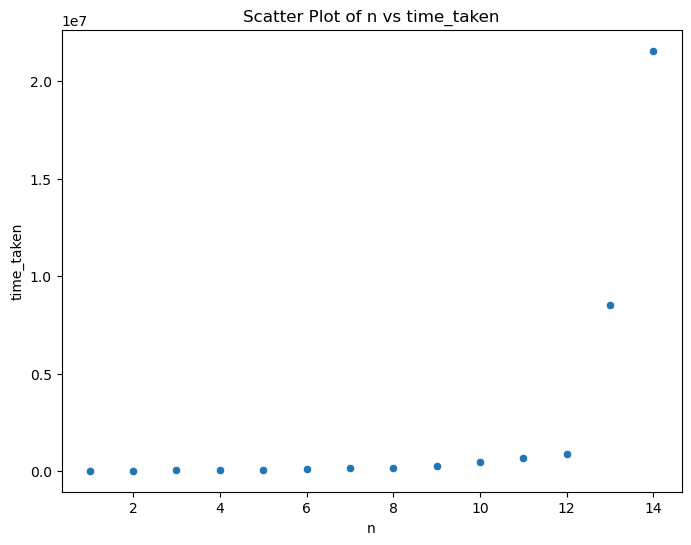

In [9]:
plot_scatter(lock_experiment_df, 'n', 'time_taken')